<a href="https://colab.research.google.com/github/Ashish-Github193/Music-genre-Identification/blob/main/Music_genre_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?"
!tar xvf "/content/genres.tar.gz?" -C "/content/"

--2024-03-02 08:02:35--  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/4jw31k5mlzcmgis/genres.tar.gz [following]
--2024-03-02 08:02:35--  https://www.dropbox.com/s/raw/4jw31k5mlzcmgis/genres.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc082982c6dbd42f4e6f46337d83.dl.dropboxusercontent.com/cd/0/inline/COT8HOZxvh2kVSIniWxKdjb-gGRDFriZtjMXUa-cQJbF1LzL-nD07jEnbrNQRNjDkgObSflJcvnu1NdRxgG3N_A3ADv17lOzbJ5AvS3TAkw9BN-zgBnorSYy-77w1K0ARWk/file# [following]
--2024-03-02 08:02:35--  https://uc082982c6dbd42f4e6f46337d83.dl.dropboxusercontent.com/cd/0/inline/COT8HOZxvh2kVSIniWxKdjb-gGRDFriZtjMXUa-cQJbF1LzL-nD07jEnbrNQRNjDkgObSflJcvnu1NdRxgG3N_A3ADv17lOzbJ5AvS3TAkw9BN-zgBnorSY

In [3]:
#!pip install shutup
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from librosa import feature
from glob import glob
import pandas as pd
import numpy as np
import librosa
import csv
import scipy

#import shutup
import os
import shutil
shutup.please()

Feature Extraction from Audio data and saving them in their respective .csv 📁 file 🔉

In [5]:
genre = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [14]:
def GenerateFeatures (path_to_file):
  #audio = librosa.util.example_audio_file()
  #audio = librosa.util.example_audio_file()
  y,sr=librosa.load(path_to_file)

  y_harmonic, y_percussive = librosa.effects.hpss(y)
  tempo, beat_frames = librosa.beat.beat_track(y=y_harmonic, sr=sr)

  chroma=librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
  mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=13)
  cent = librosa.feature.spectral_centroid(y=y, sr=sr)
  contrast=librosa.feature.spectral_contrast(y=y_harmonic,sr=sr)
  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
  zrate=librosa.feature.zero_crossing_rate(y_harmonic)

  chroma_mean=np.mean(chroma,axis=1)
  chroma_std=np.std(chroma,axis=1)
  chroma_df=pd.DataFrame()

  for i in range(0,12):
      chroma_df['chroma_mean_'+str(i)]=chroma_mean[i]
  for i in range(0,12):
      chroma_df['chroma_std_'+str(i)]=chroma_std[i]
  chroma_df.loc[0]=np.concatenate((chroma_mean,chroma_std),axis=0)

  mfccs_mean=np.mean(mfccs,axis=1)
  mfccs_std=np.std(mfccs,axis=1)
  mfccs_df=pd.DataFrame()
  for i in range(0,13):
      mfccs_df['mfccs_mean_'+str(i)]=mfccs_mean[i]
  for i in range(0,13):
     mfccs_df['mfccs_std_'+str(i)]=mfccs_std[i]
  mfccs_df.loc[0]=np.concatenate((mfccs_mean,mfccs_std),axis=0)

  cent_mean=np.mean(cent)
  cent_std=np.std(cent)
  cent_skew=scipy.stats.skew(cent,axis=1)[0]
  contrast_mean=np.mean(contrast,axis=1)
  contrast_std=np.std(contrast,axis=1)

  rolloff_mean=np.mean(rolloff)
  rolloff_std=np.std(rolloff)
  rolloff_skew=scipy.stats.skew(rolloff,axis=1)[0]

  spectral_df=pd.DataFrame()
  collist=['cent_mean','cent_std','cent_skew']
  for i in range(0,7):
      collist.append('contrast_mean_'+str(i))
  for i in range(0,7):
      collist.append('contrast_std_'+str(i))
  collist=collist+['rolloff_mean','rolloff_std','rolloff_skew']
  for c in collist:
      spectral_df[c]=0
  data=np.concatenate(([cent_mean,cent_std,cent_skew],contrast_mean,contrast_std,[rolloff_mean,rolloff_std,rolloff_std]),axis=0)
  spectral_df.loc[0]=data

  zrate_mean=np.mean(zrate)
  zrate_std=np.std(zrate)
  zrate_skew=scipy.stats.skew(zrate,axis=1)[0]

  zrate_df=pd.DataFrame()
  zrate_df['zrate_mean']=0
  zrate_df['zrate_std']=0
  zrate_df['zrate_skew']=0
  zrate_df.loc[0]=[zrate_mean,zrate_std,zrate_skew]

  beat_df=pd.DataFrame()
  beat_df['tempo']=tempo
  beat_df.loc[0]=tempo

  final_df=pd.concat((chroma_df,mfccs_df,spectral_df,zrate_df,beat_df),axis=1)

  return final_df

In [11]:
import librosa
#!pip install audioread

In [15]:
GenerateFeatures('/content/genres/blues/blues.00000.au').columns

Index(['chroma_mean_0', 'chroma_mean_1', 'chroma_mean_2', 'chroma_mean_3',
       'chroma_mean_4', 'chroma_mean_5', 'chroma_mean_6', 'chroma_mean_7',
       'chroma_mean_8', 'chroma_mean_9', 'chroma_mean_10', 'chroma_mean_11',
       'chroma_std_0', 'chroma_std_1', 'chroma_std_2', 'chroma_std_3',
       'chroma_std_4', 'chroma_std_5', 'chroma_std_6', 'chroma_std_7',
       'chroma_std_8', 'chroma_std_9', 'chroma_std_10', 'chroma_std_11',
       'mfccs_mean_0', 'mfccs_mean_1', 'mfccs_mean_2', 'mfccs_mean_3',
       'mfccs_mean_4', 'mfccs_mean_5', 'mfccs_mean_6', 'mfccs_mean_7',
       'mfccs_mean_8', 'mfccs_mean_9', 'mfccs_mean_10', 'mfccs_mean_11',
       'mfccs_mean_12', 'mfccs_std_0', 'mfccs_std_1', 'mfccs_std_2',
       'mfccs_std_3', 'mfccs_std_4', 'mfccs_std_5', 'mfccs_std_6',
       'mfccs_std_7', 'mfccs_std_8', 'mfccs_std_9', 'mfccs_std_10',
       'mfccs_std_11', 'mfccs_std_12', 'cent_mean', 'cent_std', 'cent_skew',
       'contrast_mean_0', 'contrast_mean_1', 'contrast_mean_2'

Data Genrator

In [17]:
dir = '/content/genres/'
columns = ['chroma_mean_0', 'chroma_mean_1', 'chroma_mean_2', 'chroma_mean_3',
       'chroma_mean_4', 'chroma_mean_5', 'chroma_mean_6', 'chroma_mean_7',
       'chroma_mean_8', 'chroma_mean_9', 'chroma_mean_10', 'chroma_mean_11',
       'chroma_std_0', 'chroma_std_1', 'chroma_std_2', 'chroma_std_3',
       'chroma_std_4', 'chroma_std_5', 'chroma_std_6', 'chroma_std_7',
       'chroma_std_8', 'chroma_std_9', 'chroma_std_10', 'chroma_std_11',
       'mfccs_mean_0', 'mfccs_mean_1', 'mfccs_mean_2', 'mfccs_mean_3',
       'mfccs_mean_4', 'mfccs_mean_5', 'mfccs_mean_6', 'mfccs_mean_7',
       'mfccs_mean_8', 'mfccs_mean_9', 'mfccs_mean_10', 'mfccs_mean_11',
       'mfccs_mean_12', 'mfccs_std_0', 'mfccs_std_1', 'mfccs_std_2',
       'mfccs_std_3', 'mfccs_std_4', 'mfccs_std_5', 'mfccs_std_6',
       'mfccs_std_7', 'mfccs_std_8', 'mfccs_std_9', 'mfccs_std_10',
       'mfccs_std_11', 'mfccs_std_12', 'cent_mean', 'cent_std', 'cent_skew',
       'contrast_mean_0', 'contrast_mean_1', 'contrast_mean_2',
       'contrast_mean_3', 'contrast_mean_4', 'contrast_mean_5',
       'contrast_mean_6', 'contrast_std_0', 'contrast_std_1', 'contrast_std_2',
       'contrast_std_3', 'contrast_std_4', 'contrast_std_5', 'contrast_std_6',
       'rolloff_mean', 'rolloff_std', 'rolloff_skew', 'zrate_mean',
       'zrate_std', 'zrate_skew', 'tempo']

for gen in genre:
  print (f"Current gen: {gen}")
  path = dir + gen

  files = os.listdir(path+'/')
  #create an empty dataframe
  GenreFrame = pd.DataFrame(columns=columns)

  for clip in files:
    clip_path = dir + gen + '/' + clip

    print(f'Extracting features from {clip_path}')
    clipDataFrame = GenerateFeatures(clip_path)
    clipDataFrame['label'] = gen

    GenreFrame = pd.concat((GenreFrame, clipDataFrame), axis=0)
#Save it in csv file
  GenreFrame.to_csv('/content/' + gen + '.csv')
  print(f'Label: {gen} saved at /content/{gen}.csv\n\n\n\n')
  #shutil.copy (f"/content/{gen}.csv", f"/content/drive/MyDrive/IITK DL datasets/{gen}.csv")
  shutil.copy (f"/content/{gen}.csv", f"/content/drive/MyDrive/Data/{gen}.csv")


Current gen: blues
Extracting features from /content/genres/blues/blues.00089.au
Extracting features from /content/genres/blues/blues.00036.au
Extracting features from /content/genres/blues/blues.00059.au
Extracting features from /content/genres/blues/blues.00066.au
Extracting features from /content/genres/blues/blues.00050.au
Extracting features from /content/genres/blues/blues.00054.au
Extracting features from /content/genres/blues/blues.00056.au
Extracting features from /content/genres/blues/blues.00060.au
Extracting features from /content/genres/blues/blues.00081.au
Extracting features from /content/genres/blues/blues.00004.au
Extracting features from /content/genres/blues/blues.00020.au
Extracting features from /content/genres/blues/blues.00069.au
Extracting features from /content/genres/blues/blues.00002.au
Extracting features from /content/genres/blues/blues.00037.au
Extracting features from /content/genres/blues/blues.00028.au
Extracting features from /content/genres/blues/blue

Reading .csv file and adding a new column type ✔

In [18]:
blues = pd.read_csv("/content/drive/MyDrive/Data/blues.csv")
classical = pd.read_csv("/content/drive/MyDrive/Data/classical.csv")
country = pd.read_csv("/content/drive/MyDrive/Data/country.csv")
disco = pd.read_csv("/content/drive/MyDrive/Data/disco.csv")
hiphop = pd.read_csv("/content/drive/MyDrive/Data/hiphop.csv")
jazz = pd.read_csv("/content/drive/MyDrive/Data/jazz.csv")
metal = pd.read_csv("/content/drive/MyDrive/Data/metal.csv")
pop = pd.read_csv("/content/drive/MyDrive/Data/pop.csv")
reggae = pd.read_csv("/content/drive/MyDrive/Data/reggae.csv")
rock = pd.read_csv("/content/drive/MyDrive/Data/rock.csv")

blues.drop(["Unnamed: 0"], inplace=True, axis=1)
classical.drop(["Unnamed: 0"], inplace=True, axis=1)
country.drop(["Unnamed: 0"], inplace=True, axis=1)
disco.drop(["Unnamed: 0"], inplace=True, axis=1)
hiphop.drop(["Unnamed: 0"], inplace=True, axis=1)
jazz.drop(["Unnamed: 0"], inplace=True, axis=1)
metal.drop(["Unnamed: 0"], inplace=True, axis=1)
pop.drop(["Unnamed: 0"], inplace=True, axis=1)
reggae.drop(["Unnamed: 0"], inplace=True, axis=1)
rock.drop(["Unnamed: 0"], inplace=True, axis=1)

blues['label'] = 'blues'
classical['label'] = 'classical'
country['label'] = 'country'
disco['label'] = 'disco'
hiphop['label'] = 'hiphop'
jazz['label'] = 'jazz'
metal['label'] = 'metal'
pop['label'] = 'pop'
reggae['label'] = 'reggae'
rock['label'] = 'rock'

Creating The Main Dataframe for training our Model 🚩

In [19]:
genres = [blues,
          classical,
          country,
          hiphop,
          jazz,
          metal,
          pop,
          reggae,
          disco,
          rock]

final_df = pd.concat(genres)

In [20]:
final_df.columns

Index(['chroma_mean_0', 'chroma_mean_1', 'chroma_mean_2', 'chroma_mean_3',
       'chroma_mean_4', 'chroma_mean_5', 'chroma_mean_6', 'chroma_mean_7',
       'chroma_mean_8', 'chroma_mean_9', 'chroma_mean_10', 'chroma_mean_11',
       'chroma_std_0', 'chroma_std_1', 'chroma_std_2', 'chroma_std_3',
       'chroma_std_4', 'chroma_std_5', 'chroma_std_6', 'chroma_std_7',
       'chroma_std_8', 'chroma_std_9', 'chroma_std_10', 'chroma_std_11',
       'mfccs_mean_0', 'mfccs_mean_1', 'mfccs_mean_2', 'mfccs_mean_3',
       'mfccs_mean_4', 'mfccs_mean_5', 'mfccs_mean_6', 'mfccs_mean_7',
       'mfccs_mean_8', 'mfccs_mean_9', 'mfccs_mean_10', 'mfccs_mean_11',
       'mfccs_mean_12', 'mfccs_std_0', 'mfccs_std_1', 'mfccs_std_2',
       'mfccs_std_3', 'mfccs_std_4', 'mfccs_std_5', 'mfccs_std_6',
       'mfccs_std_7', 'mfccs_std_8', 'mfccs_std_9', 'mfccs_std_10',
       'mfccs_std_11', 'mfccs_std_12', 'cent_mean', 'cent_std', 'cent_skew',
       'contrast_mean_0', 'contrast_mean_1', 'contrast_mean_2'

In [56]:
final_df

,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,...,contrast_std_5,contrast_std_6,rolloff_mean,rolloff_std,rolloff_skew,zrate_mean,zrate_std,zrate_skew,tempo,label
0,0.266855,0.200701,0.071054,0.118813,0.191110,0.025013,0.093233,0.264743,0.349880,0.477586,...,4.211450,3.303500,1456.105838,1034.744457,1034.744457,0.018232,0.009717,1.281101,99.384014,blues
1,0.281213,0.061284,0.085379,0.184960,0.232542,0.530817,0.127588,0.076258,0.128774,0.187071,...,3.610123,3.293248,2621.496780,1739.211920,1739.211920,0.029742,0.011577,1.928239,117.453835,blues
2,0.311507,0.257137,0.339591,0.174379,0.232725,0.277642,0.255151,0.391827,0.244564,0.240563,...,4.802464,2.567384,4389.459356,850.746195,850.746195,0.135674,0.072731,0.425269,107.666016,blues
3,0.252849,0.169192,0.400577,0.224252,0.246867,0.180543,0.147021,0.268923,0.159785,0.243505,...,3.872269,2.198516,4972.721052,856.838803,856.838803,0.094997,0.045070,1.237631,107.666016,blues
4,0.228142,0.213254,0.227895,0.270389,0.344872,0.239210,0.308835,0.157814,0.168577,0.195313,...,3.334283,2.788128,4174.460398,899.101855,899.101855,0.070170,0.032939,0.953205,135.999178,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.117485,0.081602,0.035189,0.070588,0.207735,0.474580,0.430399,0.370916,0.309750,0.250150,...,3.175224,3.496085,3042.701555,1591.465189,1591.465189,0.025414,0.014336,1.796299,184.570312,rock
96,0.244400,0.122303,0.302569,0.204568,0.420080,0.299703,0.217622,0.316242,0.155525,0.366249,...,2.760280,1.943929,6203.061331,1882.294804,1882.294804,0.104626,0.024633,0.367052,172.265625,rock
97,0.034350,0.323020,0.036257,0.054008,0.340629,0.161683,0.567146,0.139165,0.153168,0.317908,...,2.883283,2.078422,4496.092844,2578.515093,2578.515093,0.071979,0.037999,1.676185,112.347147,rock
98,0.211841,0.116723,0.323221,0.094134,0.173687,0.068731,0.222022,0.322457,0.115777,0.300990,...,3.681570,2.936771,3380.446432,1223.925734,1223.925734,0.058383,0.021069,0.934570,112.347147,rock


Encoding labels of Target column ✈

In [21]:
final_df.sample(20)

,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,...,contrast_std_5,contrast_std_6,rolloff_mean,rolloff_std,rolloff_skew,zrate_mean,zrate_std,zrate_skew,tempo,label
12,0.042551,0.055011,0.214459,0.302494,0.449617,0.170069,0.229414,0.220900,0.193880,0.261759,...,3.018716,3.119330,3042.410115,885.511646,885.511646,0.064812,0.025843,1.672138,161.499023,blues
80,0.342802,0.241614,0.160277,0.432906,0.135048,0.234463,0.086880,0.207339,0.356048,0.187317,...,1.918302,2.390898,4687.268718,676.902311,676.902311,0.121977,0.020722,0.204437,129.199219,rock
5,0.088396,0.081435,0.129187,0.077913,0.390939,0.097175,0.208288,0.379474,0.294527,0.481931,...,3.452371,3.226586,5364.140727,1281.221919,1281.221919,0.100339,0.040442,1.296218,172.265625,rock
36,0.230946,0.427827,0.068287,0.260389,0.034868,0.215058,0.232705,0.142000,0.211498,0.019512,...,2.514366,1.735915,2360.475389,487.554769,487.554769,0.048628,0.014978,0.819374,107.666016,classical
68,0.192230,0.212711,0.087095,0.145478,0.116723,0.381323,0.468809,0.097868,0.208872,0.199501,...,5.673917,2.973898,1831.221564,1161.149917,1161.149917,0.035114,0.033797,2.189643,99.384014,blues
46,0.287845,0.084466,0.154762,0.165812,0.391055,0.377819,0.277479,0.300970,0.204518,0.213776,...,2.527666,1.838285,5832.197277,1114.677439,1114.677439,0.099387,0.026693,0.276207,135.999178,rock
93,0.193027,0.041198,0.304936,0.255466,0.056690,0.310876,0.072176,0.229661,0.292896,0.126524,...,3.818252,5.236381,2294.676715,685.103518,685.103518,0.067699,0.021130,0.758959,143.554688,classical
56,0.068472,0.198827,0.213431,0.208572,0.385336,0.172272,0.128342,0.088694,0.232939,0.381350,...,6.387323,2.262464,5477.693817,2714.430267,2714.430267,0.057425,0.047975,1.822204,151.999081,reggae
28,0.136136,0.258140,0.262214,0.253315,0.407207,0.380439,0.410309,0.250205,0.159717,0.142558,...,1.921616,2.554008,5929.641278,797.041063,797.041063,0.095868,0.035792,0.464749,161.499023,metal
49,0.335195,0.282198,0.146097,0.173265,0.178621,0.118708,0.196588,0.178423,0.255953,0.268004,...,1.637937,3.590166,5633.455649,692.260391,692.260391,0.139160,0.035246,0.507177,112.347147,metal


In [22]:
import seaborn as sns

corr = final_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,chroma_mean_10,chroma_mean_11,chroma_std_0,chroma_std_1,chroma_std_2,chroma_std_3,chroma_std_4,chroma_std_5,chroma_std_6,chroma_std_7,chroma_std_8,chroma_std_9,chroma_std_10,chroma_std_11,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,mfccs_mean_10,mfccs_mean_11,mfccs_mean_12,mfccs_std_0,mfccs_std_1,mfccs_std_2,mfccs_std_3,mfccs_std_4,mfccs_std_5,mfccs_std_6,mfccs_std_7,mfccs_std_8,mfccs_std_9,mfccs_std_10,mfccs_std_11,mfccs_std_12,cent_mean,cent_std,cent_skew,contrast_mean_0,contrast_mean_1,contrast_mean_2,contrast_mean_3,contrast_mean_4,contrast_mean_5,contrast_mean_6,contrast_std_0,contrast_std_1,contrast_std_2,contrast_std_3,contrast_std_4,contrast_std_5,contrast_std_6,rolloff_mean,rolloff_std,rolloff_skew,zrate_mean,zrate_std,zrate_skew,tempo
chroma_mean_0,1.000000,0.114067,0.003035,-0.164910,-0.263672,0.177560,-0.353923,0.083947,-0.282940,-0.237993,0.035080,0.093042,0.462667,-0.100849,0.007167,-0.064290,-0.153070,0.359738,-0.253667,0.137896,-0.159648,-0.168756,0.075326,-0.131537,-0.013777,0.025436,-0.030554,-0.057796,-0.047447,-0.077351,-0.011353,-0.067444,0.013800,-0.063956,0.022436,-0.021677,0.043845,0.029002,-0.005991,0.028737,-0.052409,-0.041960,-0.049165,-0.073606,-0.030915,-0.035146,-0.016934,0.048867,0.022337,0.023081,-0.021775,-0.056094,-0.019637,-0.048308,-0.033540,0.030545,0.035633,0.054290,0.069335,-0.049501,-0.004531,-0.069438,-0.029913,0.012395,0.032578,0.034987,-0.011836,-0.025266,-0.027515,-0.027515,0.036583,-0.048508,-0.075288,-0.020406
chroma_mean_1,0.114067,1.000000,0.202457,0.162843,-0.098500,-0.202329,0.101077,-0.352510,0.105406,-0.141258,-0.050612,0.089638,-0.247350,0.410386,-0.193661,-0.011309,-0.188478,-0.265475,0.172718,-0.277209,-0.017301,-0.224426,-0.197281,-0.049786,0.104054,-0.148263,0.043597,0.069178,0.000475,0.091636,0.070981,0.130779,0.067100,0.129920,0.092873,0.160954,0.077073,-0.113826,-0.033308,-0.040686,-0.075053,-0.082966,-0.057336,-0.048586,-0.090285,-0.120280,-0.120502,-0.119286,-0.156856,-0.156926,0.155329,0.074384,-0.081974,-0.013474,-0.225087,-0.225489,-0.254014,-0.249265,-0.223599,0.003782,0.009033,-0.035786,-0.028408,-0.052902,-0.151751,-0.179257,-0.121456,0.158522,0.050544,0.050544,0.077125,0.077460,0.040956,0.013388
chroma_mean_2,0.003035,0.202457,1.000000,0.119100,-0.034489,-0.203282,-0.102928,0.100153,-0.387894,-0.036108,-0.245651,-0.100682,0.030927,-0.116017,0.415615,-0.070384,-0.044192,-0.143007,-0.077913,0.296526,-0.238465,0.006580,-0.176018,-0.043258,0.025552,0.006845,-0.083142,-0.024928,-0.095587,-0.023226,-0.082226,-0.009552,-0.092894,-0.004340,-0.033082,0.010870,-0.041917,-0.003879,0.024053,-0.046609,-0.010256,-0.031750,-0.036250,0.020721,-0.041935,-0.038512,-0.025144,-0.043710,-0.007019,0.016626,0.032637,-0.017006,-0.030229,0.019081,-0.078780,-0.025534,-0.007756,0.007033,0.025231,0.045875,0.050563,-0.019512,-0.060981,-0.050156,-0.054686,-0.021270,0.066479,0.026250,-0.038486,-0.038486,0.071681,0.020618,-0.048715,0.011752
chroma_mean_3,-0.164910,0.162843,0.119100,1.000000,0.107509,0.084483,0.001766,-0.208582,0.139294,-0.362371,0.177005,-0.165183,-0.242137,0.053812,-0.232221,0.479939,-0.250895,-0.135532,-0.056386,-0.234627,0.230044,-0.341165,0.039481,-0.165827,0.125910,-0.117038,-0.001882,0.095697,-0.086994,0.131240,-0.049603,0.138395,-0.026360,0.126756,-0.046683,0.121719,-0.047457,-0.101233,-0.071871,-0.065711,-0.084273,-0.073714,-0.043051,-0.017382,-0.071048,-0.138309,-0.118850,-0.140500,-0.131452,-0.164772,0.117597,0.016964,-0.048224,-0.032250,-0.247391,-0.218054,-0.234318,-0.216783,-0.184248,0.084990,0.048811,-0.072803,-0.027236,-0.048657,-0.123852,-0.121380,-0.042330,0.126452,-0.010767,-0.010767,0.084336,0.099483,0.036003,0.015480
chroma_mean_4,-0.263672,-0.098500,-0.034489,0.107509,1.000000,0.135542,0.176886,-0.170450,-0.147568,0.144868,-0.3703

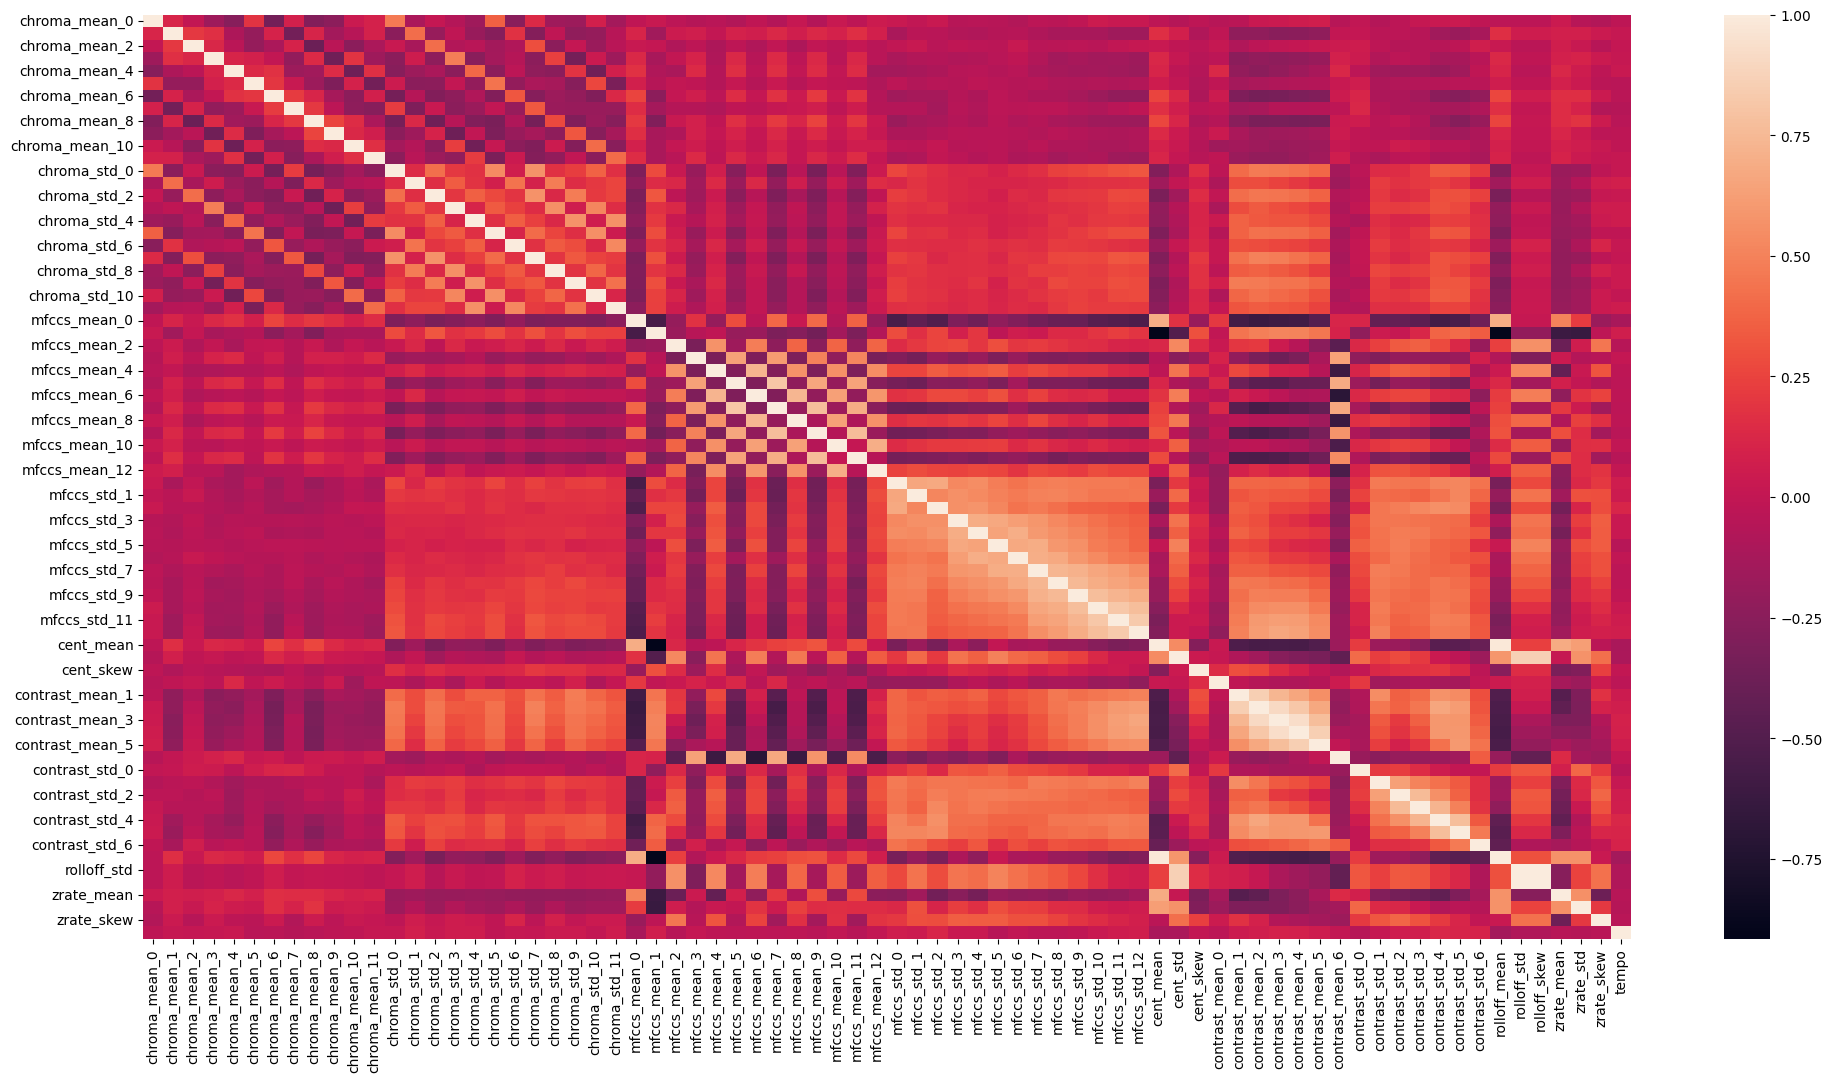

In [23]:
import seaborn as sns

f = plt.figure()
f.set_figwidth(24)
f.set_figheight(12)
sns.heatmap(final_df.corr())
plt.savefig("Plotting_Correlation_HeatMap.jpg")

Encoding Labels of Target variable ⚓

In [24]:
convertor = LabelEncoder()
class_list = final_df.iloc[:,-1]
y = convertor.fit_transform(class_list)

In [57]:
final_df.iloc[:,-1]

0     blues
1     blues
2     blues
3     blues
4     blues
      ...  
95     rock
96     rock
97     rock
98     rock
99     rock
Name: label, Length: 1000, dtype: object

In [26]:
class_list

0     blues
1     blues
2     blues
3     blues
4     blues
      ...  
95     rock
96     rock
97     rock
98     rock
99     rock
Name: label, Length: 1000, dtype: object

Fitting Rest of the columns in StanderdScaler (Using fit_transform for that)

In [27]:
fit = StandardScaler()
X = fit.fit_transform(np.array(final_df.iloc[:,:-1], dtype = float))

In [28]:
X

array([[ 0.33933644,  0.02051733, -1.48774398, ..., -1.46998829,
         0.30362042, -0.80156242],
       [ 0.4775966 , -1.43742334, -1.35693034, ..., -1.36116395,
         1.10989163, -0.16626698],
       [ 0.76933153,  0.61068735,  0.96446386, ...,  2.21721717,
        -0.76266324, -0.51038535],
       ...,
       [-1.89967797,  1.29964414, -1.80549495, ...,  0.18494962,
         0.79585636, -0.345807  ],
       [-0.19045299, -0.85767484,  0.81497941, ..., -0.80570429,
        -0.12812423, -0.345807  ],
       [ 0.32779814, -0.91292895,  0.72738472, ..., -0.29777748,
        -1.35746124,  0.03037208]])

Splitting Our Dataset for Training (x_train & y_train) and Testing (y_train & y_test)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y ,test_size=0.1)

Creating TrainModel Function for training our RNN model.

In [66]:
def trainModel (model, epochs, optimizer, verbose):
  batch_size = 128

  model.compile(optimizer,
                loss='sparse_categorical_crossentropy',
                metrics='accuracy')

  return model.fit(x_train, y_train,
                 validation_data=(x_test, y_test),
                 epochs=epochs, batch_size=batch_size, verbose=verbose)

In [67]:
x_train

array([[-0.00646904,  2.39564696, -1.51300606, ..., -1.16216175,
        -0.27164744, -0.51038535],
       [ 0.3151655 ,  1.30142367,  1.85540265, ...,  1.88848642,
         0.28613035, -0.80156242],
       [-1.11896686, -0.55593786,  0.15427236, ...,  1.14947892,
         0.9689598 ,  0.03037208],
       ...,
       [-1.22800088,  1.2737442 , -0.18964846, ..., -0.21499489,
        -0.08566907,  0.03037208],
       [ 0.22171237, -0.58440655, -0.22908884, ...,  0.13519131,
        -1.11022024,  0.75138198],
       [-0.3320426 ,  0.13622945,  0.37130741, ...,  0.54361057,
         1.46849862, -0.51038535]])

Our Sequential Model ⚖

In [69]:
model = tf.keras.models.Sequential([
                             tf.keras.layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)),
                             tf.keras.layers.Dropout(0.2),

                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dropout(0.2),

                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.2),

                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dropout(0.2),

                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10, activation='softmax')
                          ])
print(model.summary())
model_history = trainModel(model=model, epochs=80, optimizer='adam', verbose=2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 512)               38400     
                                                                 
 dropout_24 (Dropout)        (None, 512)               0         
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 64)               

Summary of Model ✉

In [70]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 512)               38400     
                                                                 
 dropout_24 (Dropout)        (None, 512)               0         
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 64)               

Model evaluation (Increase test size to get better evaluation ✅

In [71]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print (f"\nThe test loss is : {round(test_loss, 2)}")
print(f"The best test accuracy is : {round(test_acc*100, 2)}%")

1/1 [==============================] - 0s 26ms/step - loss: 1.2462 - accuracy: 0.7300

The test loss is : 1.25
The best test accuracy is : 73.0%


Preparing data for pridiction ☕

In [72]:
def makeAudio_to_Data (path):

  newDataframe = GenerateFeatures (path)
  nextDataframe = GenerateFeatures ('/content/genres/disco/disco.00000.au')

  numpyArray = fit.fit_transform(np.array(pd.concat([newDataframe, nextDataframe], axis=0), dtype=float))

  return numpyArray, newDataframe

Calling makeAudio_to_Data function

In [76]:
frame, data = makeAudio_to_Data ("/content/genres/classical/classical.00001.au")

In [77]:
data

,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,...,contrast_std_4,contrast_std_5,contrast_std_6,rolloff_mean,rolloff_std,rolloff_skew,zrate_mean,zrate_std,zrate_skew,tempo
0,0.027097,0.195446,0.363495,0.07615,0.212175,0.051992,0.263006,0.196389,0.066129,0.210592,...,3.508513,3.242228,2.897163,2389.011463,609.185161,609.185161,0.087504,0.025593,-0.161013,112.347147


Predicting

In [78]:
arr = model.predict(frame)
lis = arr.tolist()
print(genre[lis[0].index(max(lis[0]))].capitalize())

1/1 [==============================] - 0s 32ms/step
Classical


In [ ]:
data.sample()

,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,...,contrast_std_4,contrast_std_5,contrast_std_6,rolloff_mean,rolloff_std,rolloff_skew,zrate_mean,zrate_std,zrate_skew,tempo
0,0.298391,0.239644,0.282745,0.200693,0.136922,0.355245,0.323364,0.24725,0.165014,0.228327,...,6.105826,5.602013,4.601369,2410.827778,1333.896432,1333.896432,0.055701,0.030833,0.748121,135.999178
